<a href="https://colab.research.google.com/github/LikhanBiswas/CNN-Models/blob/main/confusion_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
#############################################################
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K
####################################################
import os
import cv2
from PIL import Image
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_directory = '/content/drive/MyDrive/extension/0/train/'
SIZE = 150
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.
label = []

In [ ]:
real_images = os.listdir(image_directory + 'real/')
for i, image_name in enumerate(real_images):    #Remember enumerate method adds a counter and returns the enumerate object

    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'real/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [ ]:
fake_images = os.listdir(image_directory + 'fake/')
for i, image_name in enumerate(fake_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'fake/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [ ]:
import tensorflow as tf

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [ ]:
INPUT_SHAPE = (SIZE, SIZE, 3)
batch_dim = -1

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape= INPUT_SHAPE, bias_regularizer=tf.keras.regularizers.l2(l2=0.000001), activation='relu',padding='same'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),   bias_regularizer=tf.keras.regularizers.l2(l2=0.000001), activation='relu', padding='same'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),  bias_regularizer=tf.keras.regularizers.l2(l2=0.000001), activation='relu', padding='same'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),   bias_regularizer=tf.keras.regularizers.l2(l2=0.000001), activation='relu', padding='same'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),   bias_regularizer=tf.keras.regularizers.l2(l2=0.000001), activation='relu', padding='same'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),   bias_regularizer=tf.keras.regularizers.l2(l2=0.000001), activation='relu', padding='same'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization(axis=batch_dim))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation(activation='sigmoid'))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
    # EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.000001, verbose=1),

]

In [ ]:
Metrics=['accuracy',
         [tf.keras.metrics.AUC(name='auc')],
         [tf.keras.metrics.Recall(name='recall')],
         [tf.keras.metrics.Precision(name='precision')]]

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=Metrics)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       7

In [ ]:
 history= model.fit(X_train,
                         y_train,
                         batch_size = 32,
                         verbose = 1,
                         epochs = 20,
                         validation_data=(X_test,y_test),
                         shuffle = False,
                         callbacks=callbacks
                     )

Epoch 1/20
250/250 [==============================] - 458s 2s/step - loss: 0.0532 - accuracy: 0.9821 - auc: 0.9976 - recall: 0.9814 - precision: 0.9827 - val_loss: 0.0199 - val_accuracy: 0.9950 - val_auc: 0.9994 - val_recall: 1.0000 - val_precision: 0.9902
Epoch 2/20
250/250 [==============================] - 452s 2s/step - loss: 0.0206 - accuracy: 0.9927 - auc: 0.9992 - recall: 0.9922 - precision: 0.9932 - val_loss: 0.0099 - val_accuracy: 0.9970 - val_auc: 1.0000 - val_recall: 1.0000 - val_precision: 0.9941
Epoch 3/20
250/250 [==============================] - 457s 2s/step - loss: 0.0098 - accuracy: 0.9975 - auc: 0.9998 - recall: 0.9977 - precision: 0.9972 - val_loss: 0.0087 - val_accuracy: 0.9970 - val_auc: 1.0000 - val_recall: 1.0000 - val_precision: 0.9941
Epoch 4/20
250/250 [==============================] - 428s 2s/step - loss: 0.0071 - accuracy: 0.9984 - auc: 0.9997 - recall: 0.9982 - precision: 0.9985 - val_loss: 0.1350 - val_accuracy: 0.9580 - val_auc: 0.9941 - val_recall: 0.9

<Figure size 640x480 with 0 Axes>

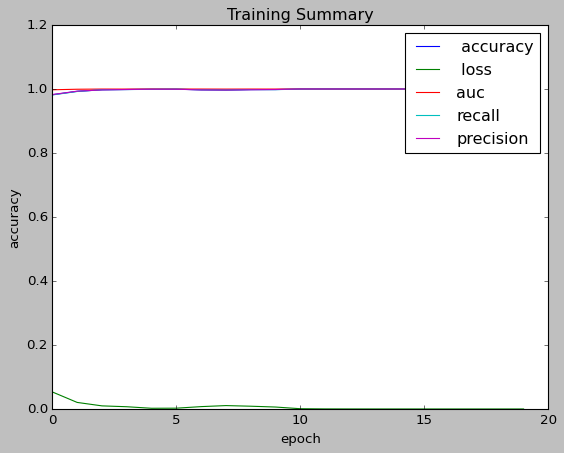

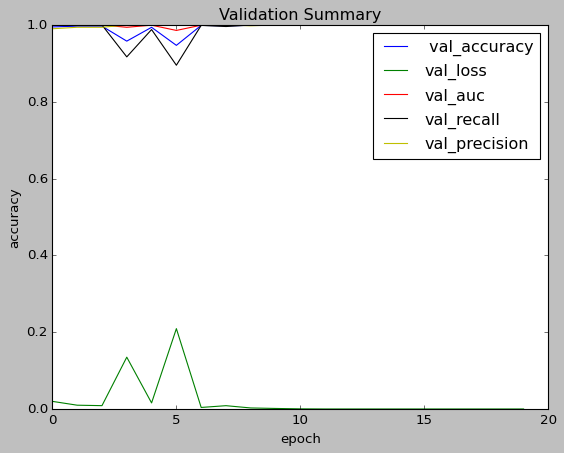

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import pyplot
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss =history.history['loss']
val_loss = history.history['val_loss']
AUC = history.history['auc']
val_AUC = history.history['val_auc']
recall= history.history['recall']
val_recall= history.history['val_recall']
precision= history.history['precision']
val_precision= history.history['val_precision']

epochs = range(len(acc))

from matplotlib import pyplot
plt.plot(epochs, acc, 'b', label=' accuracy')
plt.plot(epochs, loss, 'g', label=' loss')
plt.plot(epochs, AUC, 'r', label='auc')
plt.plot(epochs, recall, 'c', label='recall')
plt.plot(epochs, precision, 'm', label='precision')

plt.title('Training Summary')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'b', label=' val_accuracy')
plt.plot(epochs, val_loss, 'g', label='val_loss')
plt.plot(epochs, val_AUC, 'r', label='val_auc')
plt.plot(epochs, val_recall, 'k', label='val_recall')
plt.plot(epochs, val_precision, 'y', label='val_precision')

plt.title('Validation Summary')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()

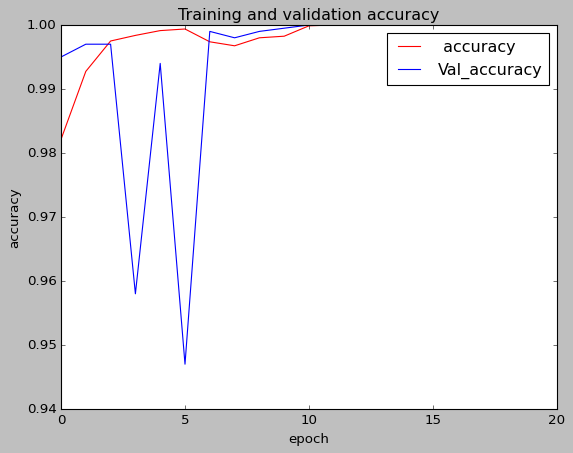

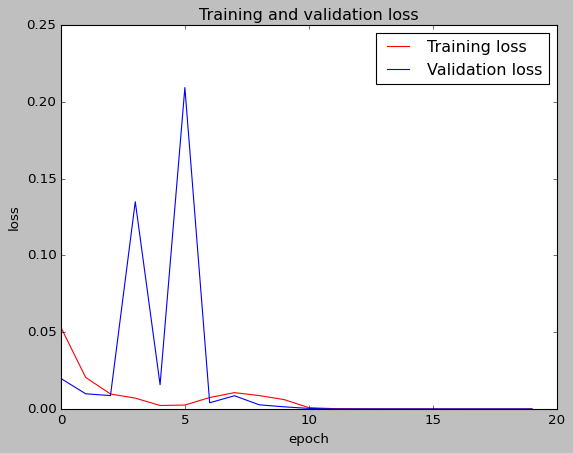

<Figure size 640x480 with 0 Axes>

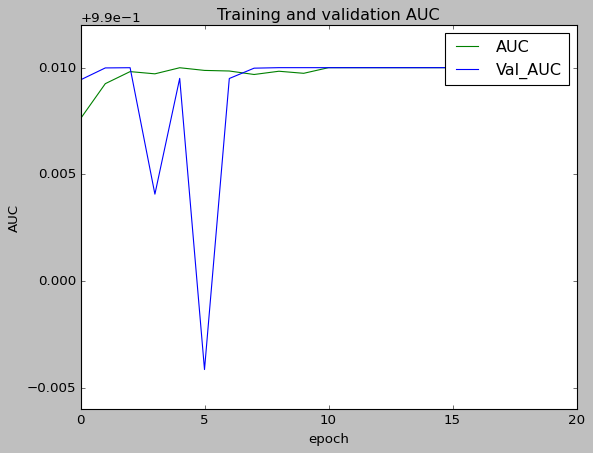

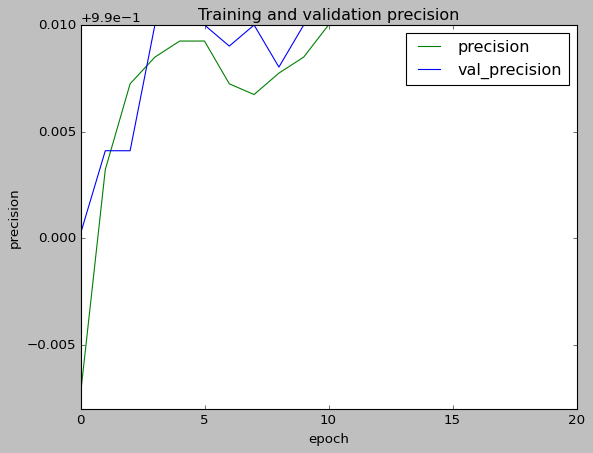

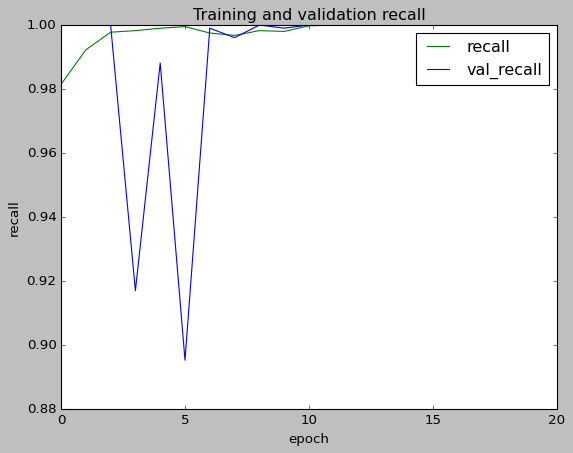

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import pyplot
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
AUC = history.history['auc']
val_AUC = history.history['val_auc']
recall= history.history['recall']
val_recall= history.history['val_recall']
precision= history.history['precision']
val_precision= history.history['val_precision']


epochs = range(len(acc))
from matplotlib import pyplot
plt.plot(epochs, acc, 'r', label=' accuracy')
plt.plot(epochs, val_acc, 'b', label='Val_accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


plt.plot(epochs, AUC, 'g', label='AUC')
plt.plot(epochs, val_AUC, 'b', label='Val_AUC')
plt.xlabel('epoch')
plt.ylabel('AUC')
plt.title('Training and validation AUC')
plt.legend()
plt.figure()

plt.plot(epochs, precision, 'g', label='precision')
plt.plot(epochs, val_precision, 'b', label='val_precision')
plt.xlabel('epoch')
plt.ylabel('precision')
plt.title('Training and validation precision')
plt.legend()
plt.figure()



plt.plot(epochs, recall, 'g', label='recall')
plt.plot(epochs, val_recall, 'b', label='val_recall')
plt.xlabel('epoch')
plt.ylabel('recall')
plt.title('Training and validation recall')
plt.legend()
plt.figure()

The prediction for this image is:  [[0.99999815]]
The actual label for this image is:  1


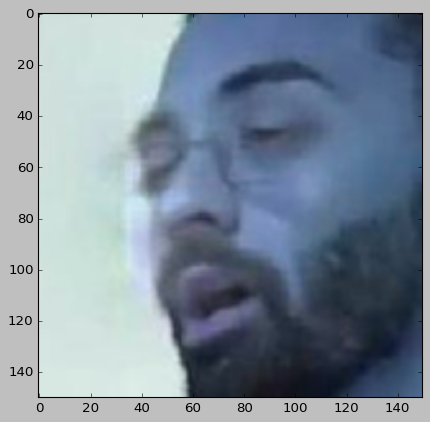

In [ ]:
n=21  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

In [ ]:
model.save('cnn model-likhan.h5')

In [ ]:
from keras.models import load_model
# load model
model = load_model('cnn model-likhan.h5')

In [ ]:
mythreshold=0.999
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[ 988    0]
 [   2 1010]]


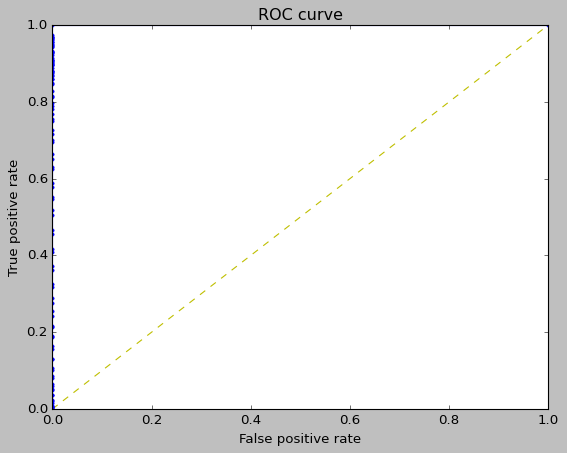

In [ ]:
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
import pandas as pd
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds'])

Ideal threshold is:  99    0.998655
Name: thresholds, dtype: float32


In [ ]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  1.0


In [ ]:
from sklearn.metrics import classification_report
target_names = ['real', 'fake']
print(classification_report(y_test, y_pred, target_names=target_names))
#print(classification_report(y_test.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        real       1.00      1.00      1.00       988
        fake       1.00      1.00      1.00      1012

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

